In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import boutdata
import xbout
import scipy
import xhermes

sys.path.append(r"C:\Users\Mike\OneDrive\Project\python-packages\sdtools")

from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.selectors import *

%load_ext autoreload
%autoreload 2
print("Done")

Done


In [ ]:
cs = {}

cs["SN_noguards"] = xhermes.open(r"C:\Users\Mike\OneDrive\Project\collab\tech\cases\examples\rec2d-1_default")

In [ ]:
db = CaseDB(
    case_dir = r"C:\Users\Mike\OneDrive\Project\collab\tech\cases",
    grid_dir = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid"
)

toload = [ 
    dict(name="base", id="rec2d-1_default", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True, keep_xboundaries = False, keep_yboundaries = False)
    cs[case["name"]].extract_2d_tokamak_geometry()  # This is required for geometry normalisation, calculation of volume etc


- Reading case rec2d-1_default
-----------------------
- Looking for squash file
- Squash file found. squash date 04/01/2025, 12:10:05, dmp file date 04/01/2025, 11:35:34

Unnormalising with xHermes
- Reading case rec2d-2_lower_Tt
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done

Unnormalising with xHermes


In [40]:
import netCDF4 as nc

with nc.Dataset(r"C:\Users\Mike\OneDrive\Project\collab\tech\cases\examples\rec2d-2_lower_Tt\BOUT.dmp.0.nc") as ds:
    [print(x) for x in ds.variables.keys()]


BOUT_VERSION
Bnorm
Bxy
Cs0
Dnnd
Ed+_iz
Ed+_rec
Ed_target_recycle
Edd+_cx
Fd+_iz
Fd+_rec
Fdd+_cx
G1
G2
G3
HERMES_REVISION
HERMES_SLOPE_LIMITER
J
Kdd+_cx
MXG
MXSUB
MYG
MYPE
MYSUB
MZ
MZG
MZSUB
NVd
NVd+
NXPE
NYPE
NZPE
Nd
Nd+
Ne
Nnorm
Omega_ci
PE_XIND
PE_YIND
Pd
Pd+
Pd+_src
Pd_src
Pe
Pe_src
Rd+_ex
Rd+_rec
SNVd
SNVd+
SNd
SNd+
SPd
SPd+
SPe
Sd+_iz
Sd+_rec
Sd+_src
Sd_src
Sd_target_recycle
Td
Td+
Te
Tnorm
Vd+
Ve
ZMAX
ZMIN
anomalous_Chi_d+
anomalous_Chi_e
anomalous_D_d+
anomalous_D_e
anomalous_nu_d+
anomalous_nu_e
cvode_last_order
cvode_last_step
cvode_nfevals
cvode_nliters
cvode_nniters
cvode_nonlin_fails
cvode_npevals
cvode_nsteps
cvode_num_fails
cvode_stab_lims
ddt(NVd)
ddt(NVd+)
ddt(Nd)
ddt(Nd+)
ddt(Pd)
ddt(Pd+)
ddt(Pe)
dx
dy
dz
efd+_cond_ylow
efd+_kin_ylow
efd+_tot_xlow
efd+_tot_ylow
efd_adv_par_ylow
efd_adv_perp_xlow
efd_adv_perp_ylow
efd_cond_par_ylow
efd_cond_perp_xlow
efd_cond_perp_ylow
efe_cond_ylow
efe_kin_ylow
efe_tot_xlow
efe_tot_ylow
g11
g12
g13
g22
g23
g33
g_11
g_12
g_13
g_22
g_23


jyseps2_2 39
ny_inner 24


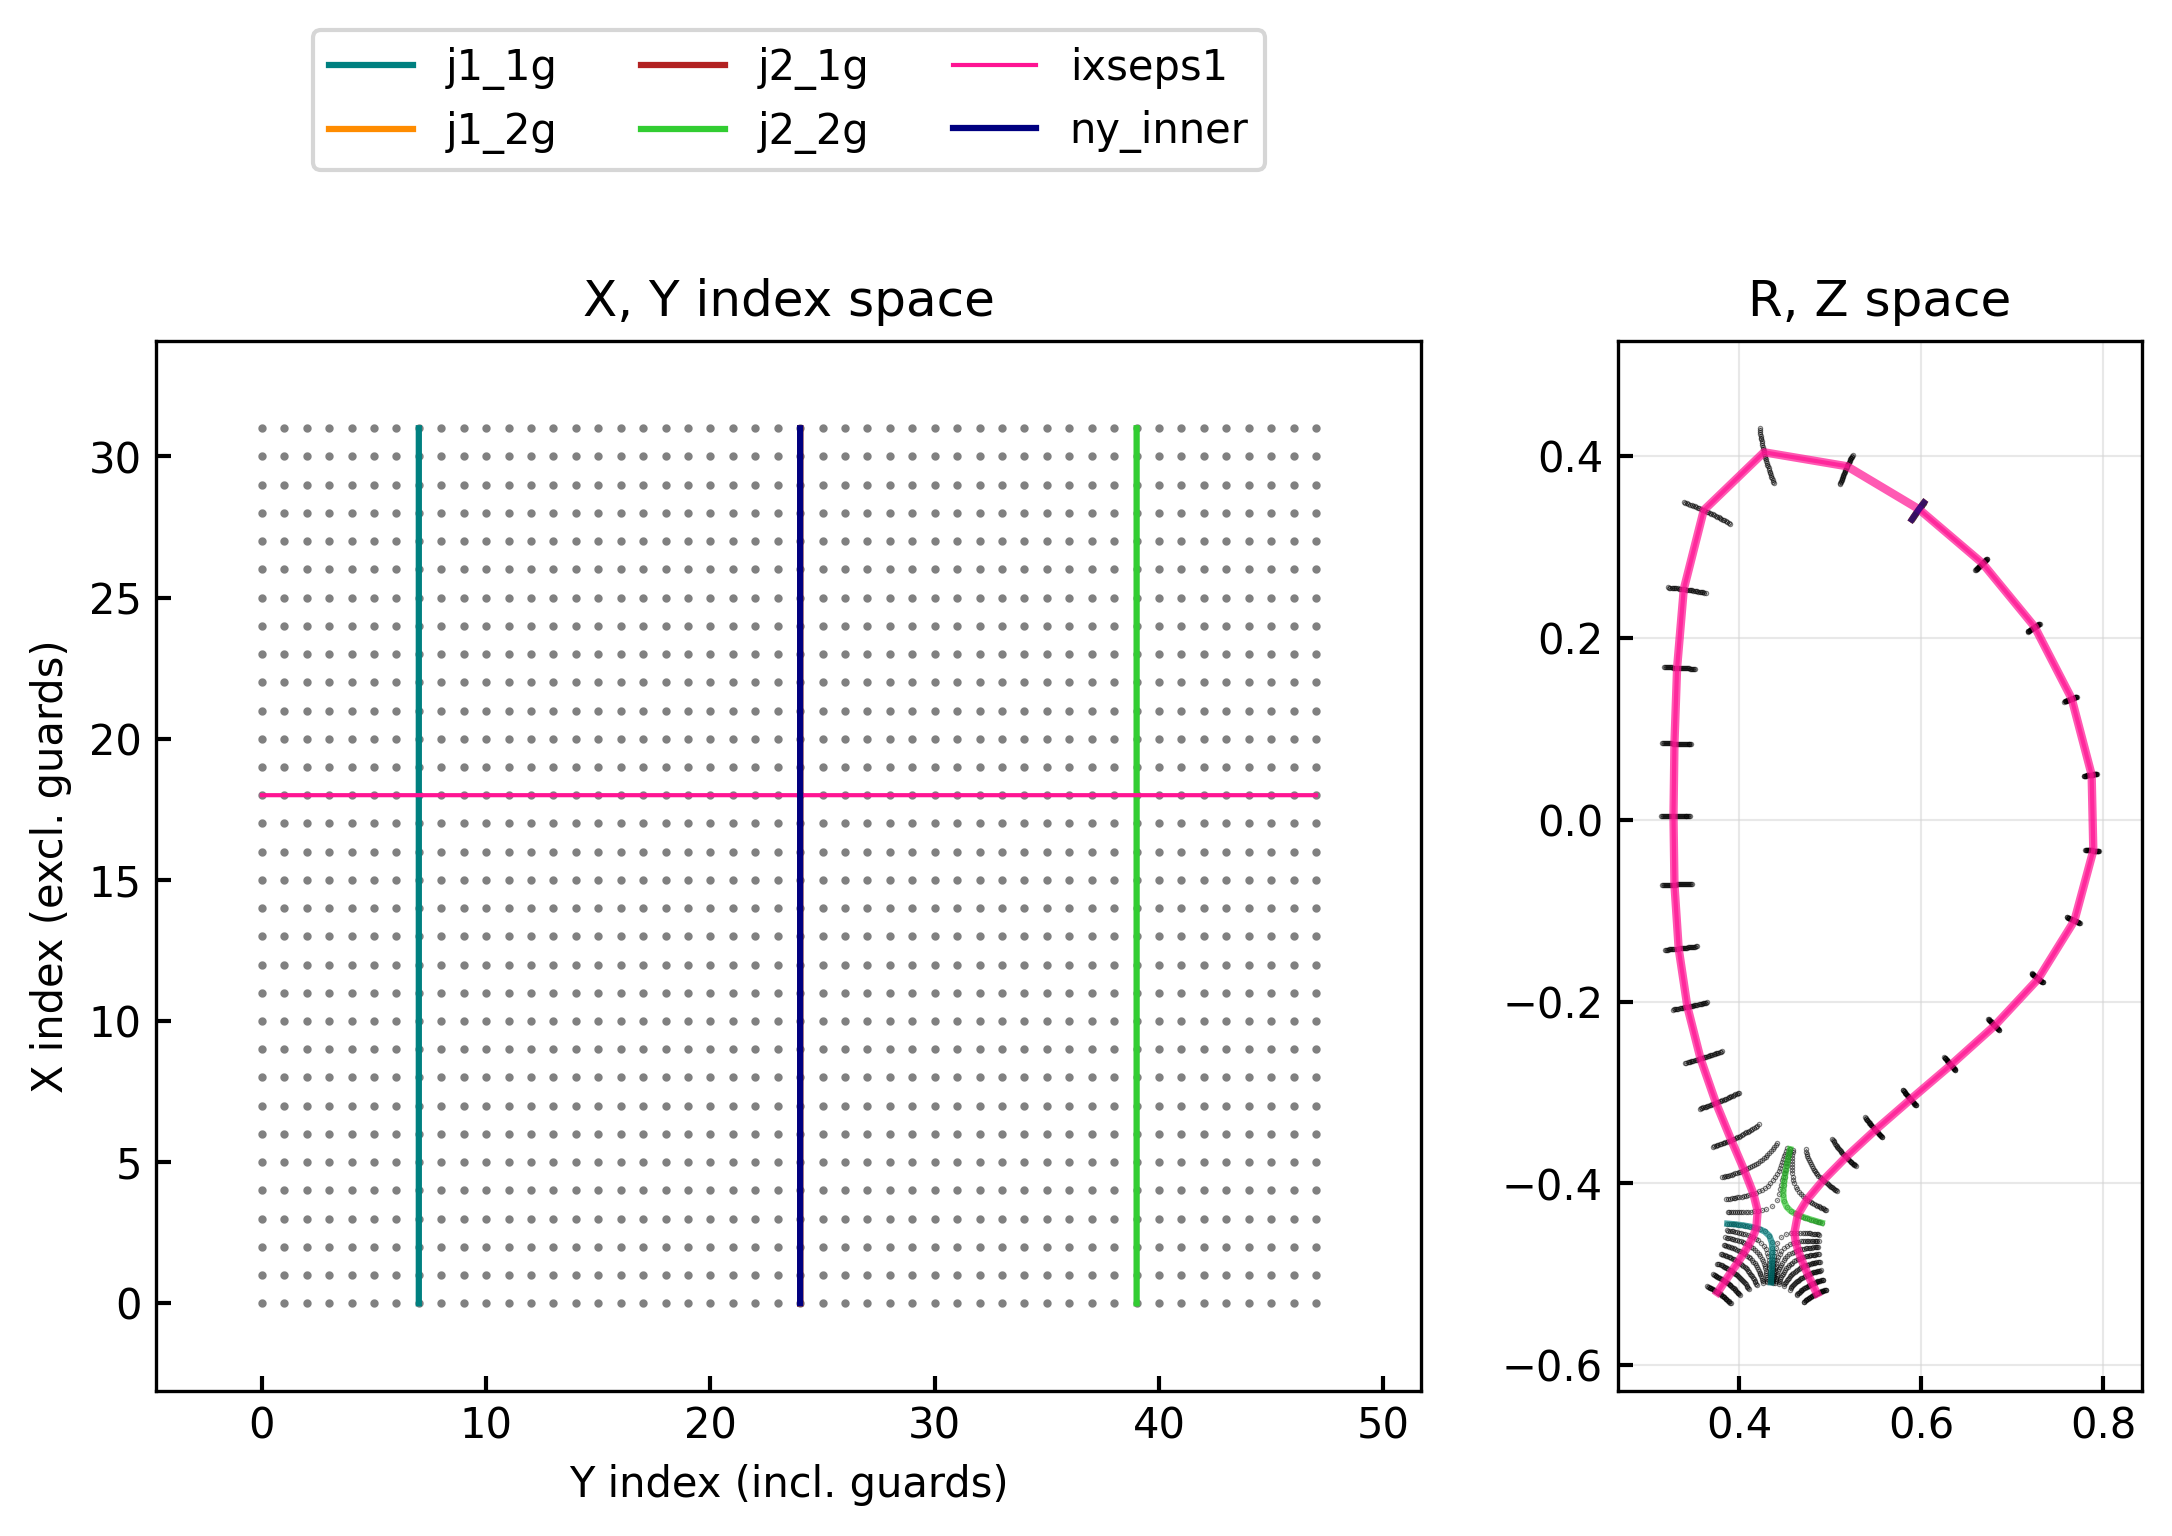

In [42]:
ds = cs["base"].ds.isel(t=-1)
m = ds.metadata
omp_index = int((m["jyseps2_2"] - m["ny_inner"]) / 2) + m["ny_inner"]
print("jyseps2_2", m["jyseps2_2"])
print("ny_inner", m["ny_inner"])
# plot_selection(ds, ds[{"theta":omp_index}], dpi = 300)
plot_selection(ds, ds.hermesm.select_region("outer_midplane_a"), dpi = 300)

In [32]:
def get_var(name):
        return  boutdata.collect(
            name,
            path = r"C:\Users\Mike\OneDrive\Project\collab\tech\cases\examples\rec2d-1_default",
            yguards = "include_upper",  # Always with guards to minimise mistakes
            xguards = True,  # Always with guards to minimise mistakes
            strict = True,   # To prevent reading wrong variable by accident
            info = False,
            # datafile_cache = cache
        ).squeeze()

# Get normalisations and geometry
Nnorm = get_var("Nnorm")
Tnorm = get_var("Tnorm")
Omega_ci = get_var("Omega_ci")
MYG = get_var("MYG")
ixseps1 = get_var("ixseps1")
jyseps1_2 = get_var("jyseps1_2")
jyseps2_2 = get_var("jyseps2_2")
ny_inner = get_var("ny_inner")
Z = get_var("Zxy")
dx = get_var("dx")
dy = get_var("dy")
dz = get_var("dz")
J = get_var("J")

ValueError: Variable 'Zxy' not found

In [31]:
MYG

BoutArray(2)

In [34]:
cs.keys()

dict_keys(['base', 'lowerTt'])

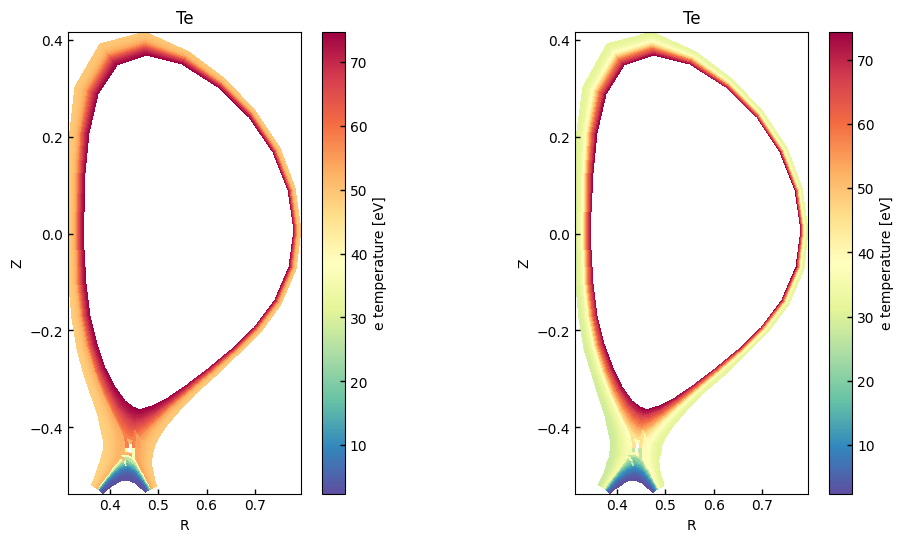

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

cs["base"].ds.isel(t=-1)["Te"].bout.pcolormesh(ax = axes[0], vmin = None, vmax = None, cmap = "Spectral_r", separatrix = False, targets = False)
cs["lowerTt"].ds.isel(t=-1)["Te"].bout.pcolormesh(ax = axes[1], vmin = None, vmax = None, cmap = "Spectral_r", separatrix = False, targets = False)

In [ ]:
plot_2d_timeslices(cs["base"].ds)

C:\Users\Mike\OneDrive\Project\python-packages\sdtools\hermes3\accessors.py:9: AccessorRegistrationWarning: registration of accessor <class 'hermes3.accessors.HermesDataArrayAccessor'> under name 'hermesm' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  @register_dataarray_accessor("hermesm")
C:\Users\Mike\OneDrive\Project\python-packages\sdtools\hermes3\accessors.py:47: AccessorRegistrationWarning: registration of accessor <class 'hermes3.accessors.HermesDatasetAccessor'> under name 'hermesm' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @register_dataset_accessor("hermesm")


IndexError: index 18 is out of bounds for axis 0 with size 0

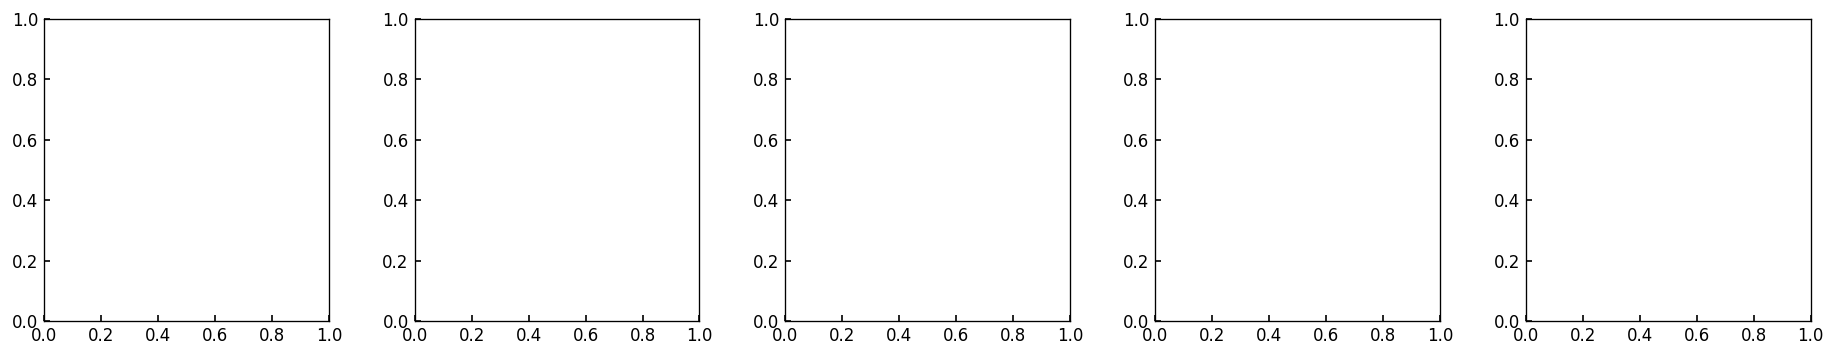

In [6]:
ds = cs["base"].ds

toplot = {}
toplot["start"] = ds.isel(t=0)
toplot["end"] = ds.isel(t=-1)
    
lineplot(
    toplot,
    clean_guards = False,
    params = ["Ne", "Nd", "Pe","Te", "Rd+_ex"],
    regions = ["omp"],
)